## TOC:
* [0.0 Text Analytics : Creating N-grams](#00-bullet)
* [0.1 Text Analytics : Basics of Counting (Collections)](#01-bullet)  
* [0.2 Text Analytics: RegExp](#02-bullet)
* [0.3 Text Analytics: Extracting Email Domains](#03-bullet)
* [0.4 Text Analytics: Extracting y sound ending words](#04-bullet)


* [1. Exploring Data](#1-bullet)
* [1.1 Exploring Data: Pivot Table and Distributions](#1.1-bullet)
* [1.2.1 Exploring Data: QUICK Plotting: Scatterr Plot](#1.2.1-bullet)
* [1.2.2 Exploring Data: QUICK Plotting: Histogram](#1.2.2-bullet)
* [1.2.3 Exploring Data: Line Plot/ Time series plot](#1.2.3-bullet)
* [1.2.4 Exploring Data: BARPLOTS](#1.2.4-bullet)
 
 
* [4. Extend List](#4-bullet)
* [5. Use ML Model Later, Import Decision Tree](#5-bullet)

* [6. Operating with Date-Times](#6-bullet)

* [7. Check Arrays Occupying Same space ](#7th-bullet)
* [8. Joining Datasets](#8-bullet)

* [9.1 Missing Values in Data Preprocessing](#9.1-bullet)
* [9.2 Missing Values upon Reading Data](#9.2-bullet)

* [10. Accessing Online Spreadsheet in Python](#10-bullet)



* [12. Pandas -- Dataframes](#12-bullet)
* [12.1 Pandas -- Adding data, Aggregating ](#12.1-bullet)
* [12.2 Pandas - Recoding: w Map and Replace ](#12.2-bullet)
* [12.3 Pandas -  Apply Usage  ](#12.3-bullet)
* [12.4 Pandas -- Data Types and Filtering (Use &, | -- Bitwise) a ](#12.4-bullet)  


* [13. MACHINE LEARNING CASE STUDY](#13-bullet)
* [13.0 ML: uNI/Multivariate Plotting ](#13.0-bullet)
* [13.1 ML: DATA SPLITTING](#13.1-bullet)
* [13.2 ML CLASSIFICATION: MODEL BUILDING AND COMPARISON](#13.2-bullet)  
* [13.3 ML: Comparing Algorithms visually](#13.3-bullet)
* [13.4 ML: MAKING PREDICTIONS ON TEST DATA ](#13.4-bullet)


* [15. Function Execution - Dynamic Typing](#15-bullet)
* [16. Converting Monthly Data to Daily Data](#16-bullet)
* [17. Pandas -- Rename needs Output](#17-bullet)
* [18. Pandas -- Converting Dataframe into Dictionary](#18-bullet)


* [20. URL Reading -- Reading Webpage Title with BeautifulSoup ](#20-bullet)




Source : https://www.analyticsvidhya.com/blog/2017/05/questions-python-for-data-science/
https://www.analyticsvidhya.com/blog/2016/09/solutions-data-science-in-python-skilltest/

Comparing Pandas with R: https://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html

QUICK barplot: train.Category.value_counts().plot(kind='bar') 


QUICK STACKED BARPLOT: train.unstack().plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

QUICK PLOT WITH COLOR INTENSITY CODED with Count: plt.scatter(train.temp,train.atemp,alpha=1,c=train.Count,s=20)
QUICK BOXPLOT: train.boxplot(column='temp', by='season')

QUICK AUTOCORRELATION PLOT:
pd.tools.plotting.autocorrelation_plot(train.temp)


Finding features not present in train:
set(test.columns).difference(set(train.columns))

Checking if all values of product_id in test present in train?
set(test.Product_ID.unique()).issubset(set(train.Product_ID.unique()))

ÕPETUS: PYTHONIS ON TIHTI 2 VÕIMALUS: KAS ALUSTAD KÄSKU MODULE. või object. ! Näiteks siin jällegi on module-dot (numpy.dot). To view all methods in module, use module-dot.

# 0. Text Analytics <a class="anchor" id="0-bullet"></a>

It's not always necessary to use regular expressions. If we have a string object, then we can use the str.methods in the following way e.g. 

when want to know how many of names have "Mr" contained in them then convert that Series object to string by calling the seriesobject.str and then the string method

OR

When you want to find records that start with F, then
train.Item_Identifier.str.startswith('F')



In [94]:
print(type(train.Name.str))
(train.Name.str.find('Mr.')>0).sum() # notice string conversion like object.str


<class 'pandas.core.strings.StringMethods'>


517

# 0.0 N-grams <a class="anchor" id="00-bullet"></a>
You want to write a generic code to calculate n-gram of the text. The 2-gram of this sentence would be  [["this, "is"], ["is", "a"], ["a, "sample"], ["sample", "text"]]

In [101]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 6
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
    print(grams)

('this', 'is', 'a', 'foo', 'bar', 'sentences')
('is', 'a', 'foo', 'bar', 'sentences', 'and')
('a', 'foo', 'bar', 'sentences', 'and', 'i')
('foo', 'bar', 'sentences', 'and', 'i', 'want')
('bar', 'sentences', 'and', 'i', 'want', 'to')
('sentences', 'and', 'i', 'want', 'to', 'ngramize')
('and', 'i', 'want', 'to', 'ngramize', 'it')


## 0.1 Basics of Counting (Collections)  <a class="anchor" id="01-bullet"></a>
Even simple text analytics cannot use dictionary so easily -- use COLLECTIONS MODULE AND COUNTER OBJECTS TO COUNT SOMETHING!

In [92]:
reviews = ['movie is unwatchable no matter how decent the first half is  . ', 'somewhat funny and well  paced action thriller that has jamie foxx as a hapless  fast  talking hoodlum who is chosen by an overly demanding', 'morse is okay as the agent who comes up with the ingenious plan to get whoever did it at all cost .']
len(reviews)
from collections import Counter
counts = Counter() # initiate the counter dictionary

for i in range(len(reviews)): # for each review
    for word in reviews[i].split(' '): # split all reviews on whitespace
        counts[word] += 1 # count the words
        


## 0.2 RegExp <a class="anchor" id="02-bullet"></a>


In [1]:
txt = '''450
 00:17:53,457 --> 00:17:56,175
 Okay, but, um,
 thanks for being with us.

451
 00:17:56,175 --> 00:17:58,616
 But, um, if there's any
 college kids watching,

452
 00:17:58,616 --> 00:18:01,610
 But, um, but, um, but, um,
 but, um, but, um,

453
 00:18:01,610 --> 00:18:03,656
 We have to drink, professor.
454
 00:18:03,656 --> 00:18:07,507
 It's the rules.
 She said "But, um"

455
 00:18:09,788 --> 00:18:12,515
 But, um, but, um, but, um...
 god help us all.
 '''
 
import re

a2 = len(re.findall('[B,b]ut, um', txt)) # right answer 
a2

11

(?<=...)
Matches if the current position in the string is preceded by a match for
... that ends at the current position. This is called a positive lookbehind 
assertion. (?<=abc)def will find a match in abcdef, since the lookbehind 
will back up 3 characters and check if the contained pattern matches

In [67]:
# regexpressions basics
import re
m = re.search('(?<=abc)def', 'abcdefi')
m.group(0)

#pattern = re.compile("d")
re.search("d",'dog') # match at index 0


<_sre.SRE_Match object; span=(0, 1), match='d'>

In [44]:
# This example looks for a word following a hyphen:
m = re.findall('(?<=-)\w+', 'spam-egg-mustard') # preceding dash
m

['egg', 'mustard']

In [78]:
m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")
m.group(0) # entire match

m.group(1)       # The first parenthesized subgroup.
'Isaac'
m.group(2)       # The second parenthesized subgroup.
'Newton'
m.group(1, 2)    # Multiple arguments give us a tuple.
('Isaac', 'Newton')

('Isaac', 'Newton')

In [ ]:
(?P<name>...)
Similar to regular parentheses, but the substring matched by the group 
is accessible via the symbolic group name name. 
Group names must be valid Python identifiers, and each group name
must be defined only once within a regular expression. 
A symbolic group is also a numbered group, just as if the group were not named.

In [79]:
# Example :
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "Malcolm Reynolds")
m.group('first_name')
'Malcolm'
m.group('last_name')
'Reynolds'

'Reynolds'

# 1. Exploring data <a class="anchor" id="1-bullet"></a>


# 1.1 Exploring data : Pivot  and CrossTable, Ratios and Distributions <a class="anchor" id="1.1-bullet"></a>
**Create a pivot table to see how the distribution of Hours per Week changes as a function of Marital Status and Occupation**
Assumes that pandas dataframe 'train' has been created. Then:

train.pivot_table(index='Marital.Status', columns='Occupation', values='Hours.Per.Week', aggfunc='sum')

**see the distribution of the relationship feature**

train['Relationship_Percentage'] = train.Relationship.map(train.Relationship.value_counts()/train.shape[0])

In [246]:
# CROSS TABLE
#titanic.columns
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [252]:
# PIVOT TABLE
titanic.pivot_table(index='Pclass',columns='Survived',values="Parch",aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [100]:
train['Pclass_percentage']=train.Pclass.map(train.Pclass.value_counts()/train.shape[0])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Cabin,Pclass_percentage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.551066
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.242424
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.551066
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.242424
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.551066


In [186]:
df.head()

,id,view,value
0,1,A,0.543405
3,2,A,0.844776
5,3,A,0.121569
9,4,B,0.575093
11,5,B,0.209202


## 1.2. Exploring Data: QUICK Plotting <a class="anchor" id="1.2-bullet"></a>
Source for Pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html

## 1.2.1 Exploring Data: Scatter Plot <a class="anchor" id="1.2.1-bullet"></a>


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


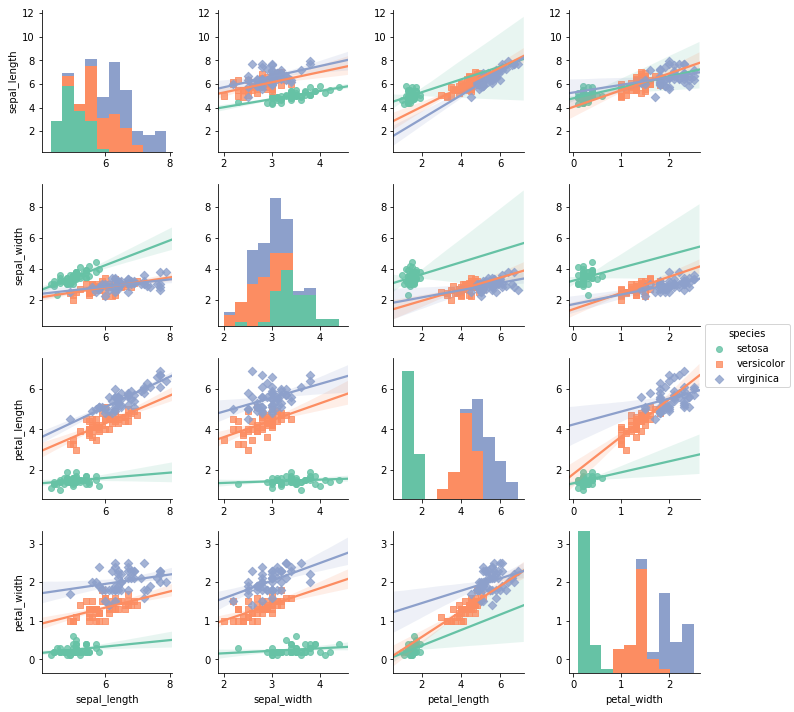

In [204]:
# also interactive plots with Plotly: https://plot.ly/python/line-and-scatter/
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
print(df.head())
# with regression
sns.pairplot(df, kind="reg", hue="species", markers=["o", "s", "D"], palette="Set2") # kind = 'scatter'
plt.show()



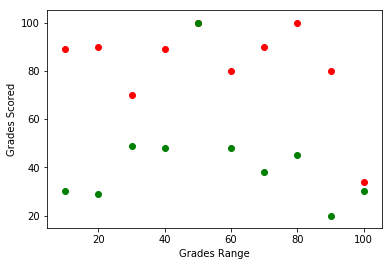

In [203]:
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(grades_range, girls_grades, color='r')
plt.scatter(grades_range, boys_grades, color='g')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()


## 1.2.2 Exploring Data: Histogram <a class="anchor" id="1.2.2-bullet"></a>

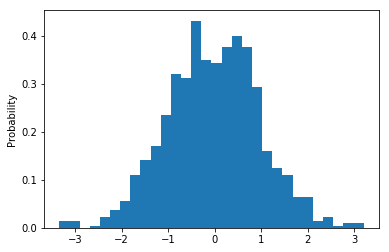

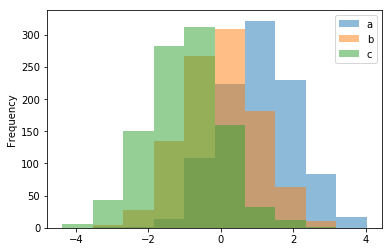

In [245]:
train.head()
plt.gcf().clear()

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');


# or using directly PANDAS

df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df4.plot.hist(alpha=0.5)

## 1.2.3 Exploring Data: TIME SERIES / LINE PLOTS <a class="anchor" id="1.2.3-bullet"></a>

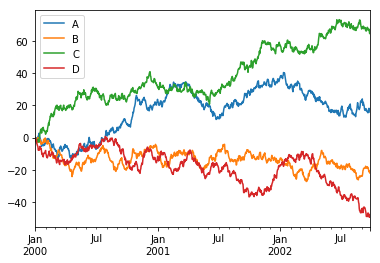

In [234]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
data = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

data.sum = data.cumsum()

%matplotlib inline
data.sum.plot();



## 1.2.4 Exploring Data: BARPLOTS <a class="anchor" id="1.2.4-bullet"></a>

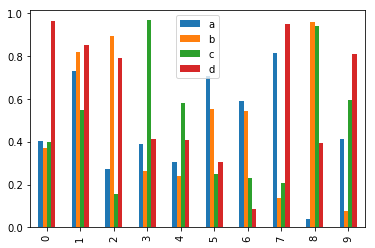

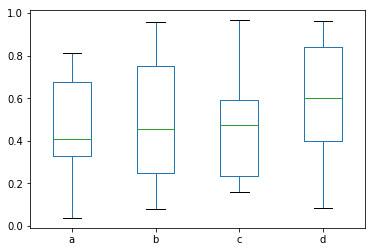

In [253]:
%matplotlib inline
bardata = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
bardata.plot.bar();
bardata.plot.box();

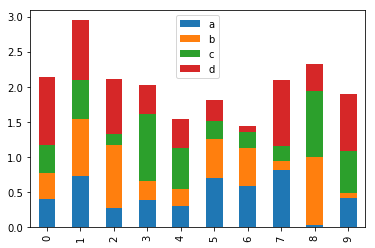

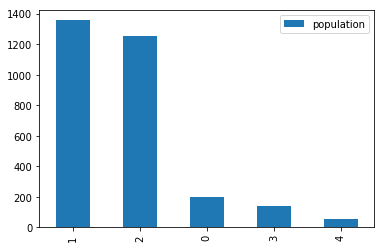

In [273]:
bardata.plot.bar(stacked=True)
import matplotlib.pyplot as plt
brics_g = brics.groupby(['country']).population.sum().reset_index().sort_values('population',ascending=False)
brics_g.plot(kind='bar',stacked=True)
plt.show()

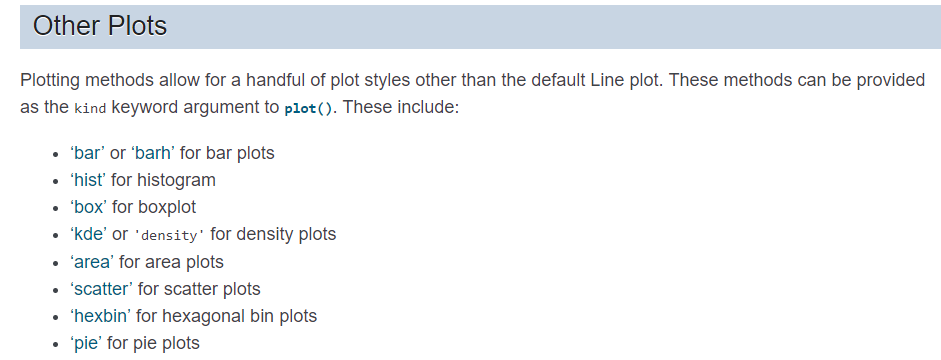

In [241]:
from IPython.display import Image
Image(filename='otherplots.PNG')

In [ ]:
fig=plt.figure()
for i in range(0,7):
    fig.add_subplot(3,3,i)
    t1=train[train['day']==i]      
    t1.groupby(['hour'])['count'].sum().plot(kind='bar')

## 0.3. Extracting Email Domain Names <a class="anchor" id="03-bullet"></a>


In [42]:
str ="""Email_Address,Nickname,Group_Status,Join_Year
aa@aaa.com,aa,Owner,2014
bb@bbb.com,bb,Member,2015
cc@ccc.com,cc,Member,2017
dd@ddd.com,dd,Member,2016
ee@eee.com,ee,Member,2020"""

In [18]:
for i in re.finditer('([a-zA-Z]+)@([a-zA-Z]+).(com)', str):
    print(i.group(2))

aaa
bbb
ccc
ddd
eee


In [184]:
string = 'hiseail blabla is mailto:tom_142@gmail.com please mail'
match=re.findall(r"[\w_]+@[\w.]+",string)
match

['tom_142@gmail.com']

## 0.4 Extracting y sound ending words <a class="anchor" id="04-bullet"></a>


In [45]:
import re
pattern = '(i$|ie$)(,)' # finds i or ie endings !
temp = []
for i in re.finditer(pattern, str):
    temp.append(i.group(1))

In [46]:
temp

[]

# 4. Concatenating Lists <a class="anchor" id="4-bullet"></a>


Question Context 4

Assume, you are given two lists:

a = [1,2,3,4,5]

b = [6,7,8,9]

The task is to create a list which has all the elements of a and b in one dimension.

Output:

a = [1,2,3,4,5,6,7,8,9]

In [49]:
a = [1,2,3,4,5]
b = [6,7,8,9]
#a.extend(b) # concatenating 2 lists with the EXTEND COMMAND
#a
c = a+b
c

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# 5. Using ML Model later, Importing Decision Tree <a class="anchor" id="5-bullet"></a>


You have built a machine learning model which you wish to freeze now and use later. 
Which of the following command can perform this task for you?

answer : dump(model, “file”) using PICKLE

**Importing decision tree classifier:**

from sklearn.tree import DecisionTreeClassifier

# 6. Operating with Date-Times <a class="anchor" id="6-bullet"></a>



** Case 1: we have Pandas Series Object, Convert to Datetime **

In [ ]:
train['Date_time_of_event'] = pd.to_datetime(train.Date_time_of_event, format="%d-%m-%Y %H:%M")

** Case 1.1 Extracting date parameters from Datetime object **

In [105]:
# to extract days
#train.Date_time_of_event.dt.day


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Missing_Cabin',
       'Pclass_percentage'],
      dtype='object')

**Formatting DateTime object -- CONVERT TO UNIX FORMAT and Finding Time Difference**

In [116]:
df2['unix_time']=pd.to_datetime(df2['B'],unit='s')
df2.head()

df2['time_diff'] = pd.datetime.now()-df2.unix_time
df2.head()

,A,B,C,D,E,F,unix_time,time_diff
0,1.0,2013-01-02,1.0,3,test,foo,2013-01-02,1957 days 15:13:17.518370
1,1.0,2013-01-02,1.0,3,train,foo,2013-01-02,1957 days 15:13:17.518370
2,1.0,2013-01-02,1.0,3,test,foo,2013-01-02,1957 days 15:13:17.518370
3,1.0,2013-01-02,1.0,3,train,foo,2013-01-02,1957 days 15:13:17.518370


** In  time variable , Replace day with first day of month **


In [120]:
df2['unix_time'] = df2.unix_time.apply(lambda x: x.replace(day=1))
df2.tail()

,A,B,C,D,E,F,unix_time,time_diff
0,1.0,2013-01-02,1.0,3,test,foo,2013-01-01,1957 days 15:13:17.518370
1,1.0,2013-01-02,1.0,3,train,foo,2013-01-01,1957 days 15:13:17.518370
2,1.0,2013-01-02,1.0,3,test,foo,2013-01-01,1957 days 15:13:17.518370
3,1.0,2013-01-02,1.0,3,train,foo,2013-01-01,1957 days 15:13:17.518370


In [165]:
import random
data = (np.random.uniform(-1,0,1000).reshape(500,2))
# remember: cumsum over rows stays in the column, so axis=1 (stay in column)
#data
#.cumsum(axis=0)
#np.cumsum(data,axis=1,out=data)


** Case 2: we have a String object **

In [100]:
# We want to convert the below string in date-time value:
import time
str = '21/01/2017'
# datetime_value = time.strptime(str,date_format)
# What should be the date_format?

In [101]:
date_format = "%d/%m/%Y" # notice that year is capitcalized!
datetime_value = time.strptime(str,date_format)
datetime_value

time.struct_time(tm_year=2017, tm_mon=1, tm_mday=21, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=21, tm_isdst=-1)

# 7. Check whether the two arrays occupy same space <a class="anchor" id="7-bullet"></a>

e = [1, 2, 3, 2, 3, 4, 4, 5, 6]

f = [[1, 2, 3], [2, 3, 4], [4, 5, 6]]

*answer*

C) Print flags of both arrays by e.flags and f.flags; check the flag “OWNDATA”.

**If one of them is False, then both the arrays have same space allocated.**

In [113]:
e = np.array([1, 2, 3, 2, 3, 4, 4, 5, 6])
f =  np.array([[1, 2, 3], [2, 3, 4], [4, 5, 6]])
e.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [111]:
if e.flags == 'False' or f.flags == 'False':
    print('Both have same space allocated')
    # don't have same space since this statement not printed

# 8. Joining Datasets <a class="anchor" id="8-bullet"></a>
Suppose you want to join train and test dataset (both are two numpy arrays train_set and test_set) into a resulting array (resulting_set) to do data processing on it simultaneously. 

train_set = np.array([1, 2, 3])
test_set = np.array([[0, 1, 2], [1, 2, 3]])
result = np.vstack([train_set,test_set])
result
help(np.vstack) # we see that vstack takes in a tuple of arrays!
 vertical stacking means that we increase the size vertically!

** to merge dataframes, use pd.concat or dataframe.merge()**

**Merge works like this**

In [166]:
A.merge(B, left_on='lkey', right_on='rkey', how='outer')

NameError: name 'A' is not defined

# 9. Filling in and Operating w Missing Values  <a class="anchor" id="9-bullet"></a>

#How can you find the number of missing values in the column “LoanAmount”?

df.isnull().sum().LoanAmount # to see missing values in all Pandas columns

## 9.1 Missing Values in Data Processing  <a class="anchor" id="9.1-bullet"></a>

In [97]:
train['Cabin'].isnull().sum()/titanic.shape[0]
# we see that 77 % of the titanic dataset has missing values

train['Missing_Cabin'] = train.Cabin.isnull().astype(int)

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'Id':[1,2,3,4],'val':[2,5,np.nan,6]})
df['new'] = np.nan
# question --- what is the output when we manually check if a value equals nan (not a number)?
print(df.val == np.nan)

# ANSWER: WE ALWAYS GET FALSE SINCE NAN DOESN'T EQUAL TO ANYTHING, 
# that means np.nan == np.nan even gives FALSE
#print(np.nan == np.nan) # yep!


# DROPPING MISSING VALUES

temp = df.dropna(axis=0,how='any',thresh=3) # thresh determines how many non missing values in a row
# 3 remaining corresponds to shape[1]-3 missing, so write that



In [ ]:
# Filling in Missing values
train['Age'] = train.groupby('Sex').transform(lambda x: x.fillna(x.mean())).Age


## 9.2 Missing Values upon Reading Data  <a class="anchor" id="9.2-bullet"></a>
While reading a csv file with numpy, you want to automatically fill missing values of column “Date_Of_Joining” with date “01/01/2010”
Which command will be appropriate to fill missing value while reading the file with numpy? 

**Answer**
 
filling_values = ("-", 0, 01/01/2010, 0)

temp = np.genfromtxt(filename, filling_values=filling_values)

help(np.genfromtxt)

## 9.3 Using Non-null values <a class="anchor" id="9.3-bullet"></a>


Creeating new dataframe based on non-null values in the first dataframe

new_dataframe = train[~train.Credit_History.isnull()]

# 10. Accessing Online Spreadsheet in Python <a class="anchor" id="10-bullet"></a>
You have uploaded the dataset in csv format on google spreadsheet and shared it publicly. You want to access it in python, how can you do this?

**Use the io library. StringIO is obsolete**

# 12. Pandas -- Dataframes <a class="anchor" id="12-bullet"></a>
Reading data into dataframe when no column names in file, but you know them -- use names argument

In [283]:
# %%timeit # for timing chunks
# RENAMING PANDAS COLUMN NEEDS OUTPUT!
df = pd.DataFrame({'Click_Id':['A','B','C','D','E'],'Count':[100,200,300,400,250]})
df2 = df.rename(columns = {'Count':'Click_Count'})
df2

,Click_Id,Click_Count
0,A,100
1,B,200
2,C,300
3,D,400
4,E,250


pd.read_csv("train.csv", header=None, names=['Item_Identifier' ,'Item_Weight' ,'Item_Fat_Content', 'Item_Visibility'])

*to skip rows, use skiprows = 3 (skips 3 rows)*

if dataset too big, then read only first n rows (nrows = 500), like this:

train = pd.read_csv('train.csv', nrows=500)

In [108]:

dict = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }

import pandas as pd
brics = pd.DataFrame(dict)
brics.index = ["BR", "RU", "IN", "CH", "SA"] # rownames as index
print(brics)
brics.describe()

import numpy as np
np.random.seed(100)
df = pd.DataFrame()
df['id'] = [1,1,1,2,2,3,3,3,3,4,4,5]
df['view'] = ['A', 'B', 'A', 'A','B', 'A', 'B', 'A', 'A','B', 'A', 'B']
df['value'] = np.random.random(12)

df2 = pd.DataFrame({ 'A' : 1.,
   'B' : pd.Timestamp('20130102'),
   'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
              'D' : np.array([3] * 4,dtype='int32'),
                  'E' : pd.Categorical(["test","train","test","train"]),
                'F' : 'foo' })


      area    capital       country  population
BR   8.516   Brasilia        Brazil      200.40
RU  17.100     Moscow        Russia      143.50
IN   3.286  New Dehli         India     1252.00
CH   9.597    Beijing         China     1357.00
SA   1.221   Pretoria  South Africa       52.98


## 12.1 Pandas -- Adding data, Aggregating. Transform-Command <a class="anchor" id="12.1-bullet"></a>

In [88]:
# http://pbpython.com/pandas_transform.html
train['Age'] = train.groupby('Sex').transform(lambda x: x.fillna(x.mean())).Age
# transform command is used after group by and apply (function applied to groups)
# then we could want to combine the summary done on groups into original size


203

In [ ]:
brics['capital'].apply(lambda x: pd.Categorical(x))
brics.describe() # we see that describe works only for numerical variables
brics = brics.append({'area':9.0, 'capital':'Brasilia','country':'Brazil','population':195.00}, ignore_index=True)


res = df.groupby(['id', 'view'])['value'].mean().reset_index() # 2 
res2 = df.groupby(['id', 'view']).agg({'value':'mean'})

res2.values == res.values
#print(res2)
#print(res) # we see that mean has been calculated correctly

** Finding total amount of boys and girls for year 1880 (index)**

In [ ]:

train.groupby(['Year','Gender']).size().loc[1880]

Count how many columns are categorical --- OBJECT -- columns

## 12.2 Pandas - Recoding: w Map and Replace <a class="anchor" id="12.2-bullet"></a>

In [12]:
0 # type conversion -- use astype command
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype('category')

# 1ST WAY TO RECODE - USE REPLACE_function
dictrep = {2.0:0.0,5.0:0.0}
df.loc[:,'val'] = df.val.replace(dictrep) # USE THE REPLACE command on the column, with dictionary of values
df

# 2nd way to RECODE -- MAP-FUNCTION

# titanic.Sex = titanic.Sex.map({'male':1,'female':0}).astype(int)

# 3RD USE: APPLY:
#train['Age'] = train.Age.apply(lambda x: np.array(x.split('-'), dtype=int).mean())

#4RD USE: Say you have light tickets in format ABC 023402 etc, then you can do
# train.Ticket.str.split(' ').str[-1]  ---- to take the last part of the split vector to get numeric
train = titanic
flightnumber = train.Ticket.str.split(' ').str[-1]
flightnumber[1]

,Id,val,new
0,1,0.0,NaN
1,2,0.0,NaN
2,3,NaN,NaN
3,4,6.0,NaN


In [168]:
df.columns

(df.dtypes == 'object').sum()
# now how to subset only these columns? Use double list notation
df[df.view=='A'] # calling with one list brackets means filtering ROWS
# df.query('view == A') # ALTERNATIVE WAY


# what if I need to filter by columns, by say their name?

,id,view,value
0,1,A,0.543405
2,1,A,0.424518
3,2,A,0.844776
5,3,A,0.121569
7,3,A,0.825853
8,3,A,0.136707
10,4,A,0.891322


# 12.3 Pandas Apply Usage <a class="anchor" id="12.3-bullet"></a>


In [ ]:
**Read documentation** : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
Imagine, you have a dataframe train file with 2 columns & 3 rows, which is loaded in pandas.
train  = pd.DataFrame({'id':[1,2,4],'features':[["A","B","C"],["A","D","E"],["C","D","F"]]})
train['features_t'] = train["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x])) # using apply 

What will be the output of following print command?
print train['features_t']v

In [ ]:
import pandas as pd
train  = pd.DataFrame({'id':[1,2,4],'features':[["A","B","C"],["A","D","E"],["C","D","F"]]})
train['features_t'] = train["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x])) # using apply 
print(train['features'])

## 12.4 Pandas -- Data Types and Filtering <a class="anchor" id="12.4-bullet"></a>




**Filtering out duplicates**

In [171]:
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
df # we see only first instance of ID is kept

,id,view,value
0,1,A,0.543405
3,2,A,0.844776
5,3,A,0.121569
9,4,B,0.575093
11,5,B,0.209202


** So to filter columns by data type, there are at least 3 options**

In [166]:
# OPTION 1: group data by its type to get a dict and then use that

g = df.columns.to_series().groupby(df.dtypes).groups
# convert all columns to series first and then group by their data type
{key.name: val for key, val in g.items()}

# OPTION2: use the special command select_dtypes
df.select_dtypes(include=['object'])

# OPTION 3: create a mask and use loc to filter

mask = df.dtypes == 'object'
mask

df.loc[:,mask]


,view
0,A
1,B
2,A
3,A
4,B
5,A
6,B
7,A
8,A
9,B


In [37]:
# use -s to search, like this: kaggle competitions list -s demand
# https://www.kaggle.com/c/<competition-name>/rules -- NEED TO ACCEPT BEFOREHAND
# read API for reference https://github.com/Kaggle/kaggle-api
# 1.kaggle competitions list
#2. kaggle competitions download -c titanic -p PATH
# kaggle [-h] [-c COMPETITION] [-u USERNAME] [-p PASSWORD]
 #                  [-f FILENAME]
# kaggle -h competitions
import pandas as pd
train = pd.read_csv("train.csv")
# counting people who have 
filtered = train[(train.Embarked == 'S') & (train.Sex == 'female')].shape[0]
filtered
# to submit your kaggle result, : kaggle competitions submit [-h] -c COMPETITION -f FILE -m MESSAGE

titanic = pd.read_csv('titanic/train.csv')
titanic.head()
males22 = titanic[(titanic.Sex =='male') & (titanic.Age==22.0)]
 # The or and and python statements require truth-values. For pandas these are considered ambiguous so you should use "bitwise" | (or) or & (and) operations
titanic.head()
titanic.Sex = titanic.Sex.map({'male':1,'female':0}).astype(int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


**dat.loc[:,'Name'] is view of original dataframe **

dat['Name'] is a copy of original dataframe.


# 15. Function Execution - Dynamic Typing <a class="anchor" id="15-bullet"></a>

In [170]:
def fun(x):
    x[0] = 5
    return x
# guess the output of this print  (fun(g), g) -- i.e. if g is changed inside a function,
# is it also updated dynamically in the workspace?

In [172]:
g = [1,2,3]
print(fun(g),g)

[5, 2, 3] [5, 2, 3]


## Yep! If an object is changed in a function, it is also changed in the workspace!

# 16. Converting Monthly Data to Daily Data <a class="anchor" id="16-bullet"></a>
For this, first you have to expand the data for every month (considering that every month has 30 days)
Which of the following code would do this?

In [9]:
print(brics)
new_df = pd.concat([brics]*30, ignore_index=True)
print(new_df)

     area    capital       country  population
0   8.516   Brasilia        Brazil      200.40
1  17.100     Moscow        Russia      143.50
2   3.286  New Dehli         India     1252.00
3   9.597    Beijing         China     1357.00
4   1.221   Pretoria  South Africa       52.98
5   9.000   Brasilia        Brazil      195.00
       area    capital       country  population
0     8.516   Brasilia        Brazil      200.40
1    17.100     Moscow        Russia      143.50
2     3.286  New Dehli         India     1252.00
3     9.597    Beijing         China     1357.00
4     1.221   Pretoria  South Africa       52.98
5     9.000   Brasilia        Brazil      195.00
6     8.516   Brasilia        Brazil      200.40
7    17.100     Moscow        Russia      143.50
8     3.286  New Dehli         India     1252.00
9     9.597    Beijing         China     1357.00
10    1.221   Pretoria  South Africa       52.98
11    9.000   Brasilia        Brazil      195.00
12    8.516   Brasilia        Braz

# 17. Pandas Rename -- Needs output!  <a class="anchor" id="17-bullet"></a>

In [186]:

# What is the result of df.columns ?

,Click_Id,Count
0,A,100
1,B,200
2,C,300
3,D,400
4,E,250


df2.head()
df.head()
**Answer: df.columns doesnt change the name, rename needs output variable**

# 20. URL Reading -- Reading Webpage Title with BeautifulSoup  <a class="anchor" id="20-bullet"></a>

In [61]:
html_doc = """
 <!DOCTYPE html>
 <htmllang="en">
 <head>
 <metacharset="utf-8">
 <metaname="viewport" content="width=device-width">
 <title>udacity/deep-learning: Repo for the Deep Learning Nanodegree Foundations program.</title>
 <linkrel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="GitHub">
 <linkrel="fluid-icon" href="https://github.com/fluidicon.png" title="GitHub">
 <metaproperty="fb:app_id" content="1401488693436528">  
 <linkrel="assets" href="https://assets-cdn.github.com/">   
 ... 

"""
from bs4 import BeautifulSoup
soup =BeautifulSoup(html_doc,'html.parser')
print(soup.title.string)

udacity/deep-learning: Repo for the Deep Learning Nanodegree Foundations program.


<function pandas.core.reshape.pivot.crosstab>

# 13. MACHINE LEARNING CASE STUDY  <a class="anchor" id="13-bullet"></a>
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
https://machinelearningmastery.com/start-here/

In [255]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [257]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [258]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 13.0 ML: uNI/Multivariate Plotting  <a class="anchor" id="13.0-bullet"></a>

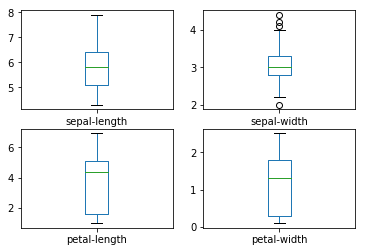

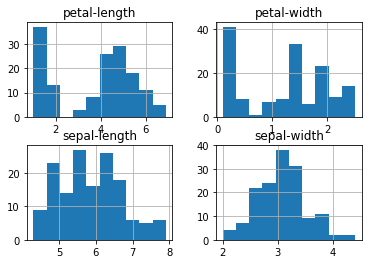

In [262]:
# univariate plotting

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histograms
dataset.hist()
plt.show()

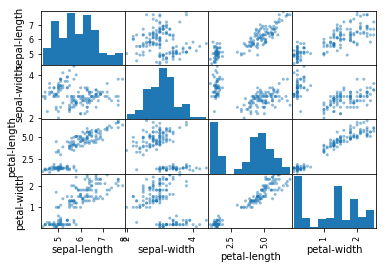

In [263]:
# MULTIVARIATE PLOTTING
	
scatter_matrix(dataset)
plt.show()

## 13.1 ML: DATA SPLITTING  <a class="anchor" id="13.1-bullet"></a>

In [270]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## 13.2 ML CLASSIFICATION: MODEL BUILDING AND COMPARISON  <a class="anchor" id="13.2-bullet"></a>

** Note that there is no separate train-command. All happens in the cross_val_score command ! **

In [267]:
seed = 7
scoring = 'accuracy'


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

    


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## 13.3 ML: Comparing Algorithms visually  <a class="anchor" id="13.3-bullet"></a>

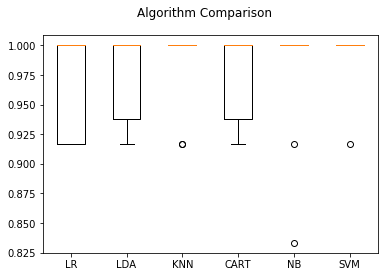

In [268]:
# results contain all the JACK-KNIFE/CV-ERRORS ON ALL of the 10 subsets. We plot these results:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 13.4 ML: MAKING PREDICTIONS ON TEST DATA  <a class="anchor" id="13.4-bullet"></a>

In [272]:
# Make predictions on TEST dataset -- KNN WAS THE WINNER:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

